<font size="5"> Demonstrating Custom KMeansAnalysis Class On Fisher's Iris Dataset in Python  </font>

Clustering algorithms are a commonly used method of unsupervised learning in ML. Of the many clustering algorithms available K-Means is by far the most popular. This Notebook will demonstrate a custom Python Class I made called KMeansAnalysis created for K selection and cluster analysis. The class serves as a wrapper for the K-Means Clustering algorithm in Sci-Kit learn. The methods that will be demonstrate are runKmeans, plots, Scatterplot and Scatterplot3d.

In [12]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

#Import Class From .PY File
from KMeans_Class import KMeansAnalysis

In the cell below I read in the Iris data and initiate the KM object using the KMeansAnalysis class. I set k=4, use a Z scaling and enter species of the Iris dataset as the response variable. It is important to note that it is not necessary to enter a Response variable as K-Means in typically used as an unsupervised method. However, it is of interest to compare how it categorizes the 3 different types of Iris’s in Fisher’s famous Iris data. Also of note, the parameter k=4 means that kmeans is run from k=2 up to k=4. For each k the total SSE and Silhouette score a stored for plotting in order to analyze the optimal k value.

<font size="4"> Run K-Means </font>

In [39]:
kmeans_kwargs = {
             "init": "random",
             "n_init": 10,
             "max_iter": 300
}

import warnings
warnings.filterwarnings('ignore')


iris = pd.read_csv('iris.csv')

KM = KMeansAnalysis(k=4,data=iris.iloc[:,0:5],scaletype='Z',kmean_Kwargs=kmeans_kwargs,response= 'Species')
KM.runKmeans()


<font size="4"> How To Chose K?  </font>

One criteria often used to determine the best k value is the total within cluster variation. Where the variation in any one cluster is given by...

$$
\begin{aligned}
&W(C_u)=\frac{1}{|C_u|}\sum_{i=1}^{N_{C_u}}\sum_{j=1}^d(x_{ij}-x_{-ij})^2
\end{aligned}
$$

Where d is the number of dimensions and ${N_{C_u}}$ is the number of observations in a given cluster.

In order to chose k the effort is to minimize the Sum of the within cluster variations. An argument defined mathematically as...

$$
\begin{aligned}
&\frac{min}{c_1....c_u} \sum_{u=1}^{k}W(C_u) 
\end{aligned}
$$


However, since the global solution to the minimization problem is to set K=n giving every data point its own cluster, it is often the guess to look at what is known as an elbow plot. The elbow of the plot shows the biggest drop in total within cluster variation.

The plot method from the KmeansAnalysis tool used below creates an elbow plot and a silhouette plot for k=2 through the parameter entered in the class. In this case k ranges from 2-4. For the Iris data it is known that the data have 3 natural clusters which correspond to specific species of flower. Looking at the elbow plot we see the kink at K=3 which is to big expected.


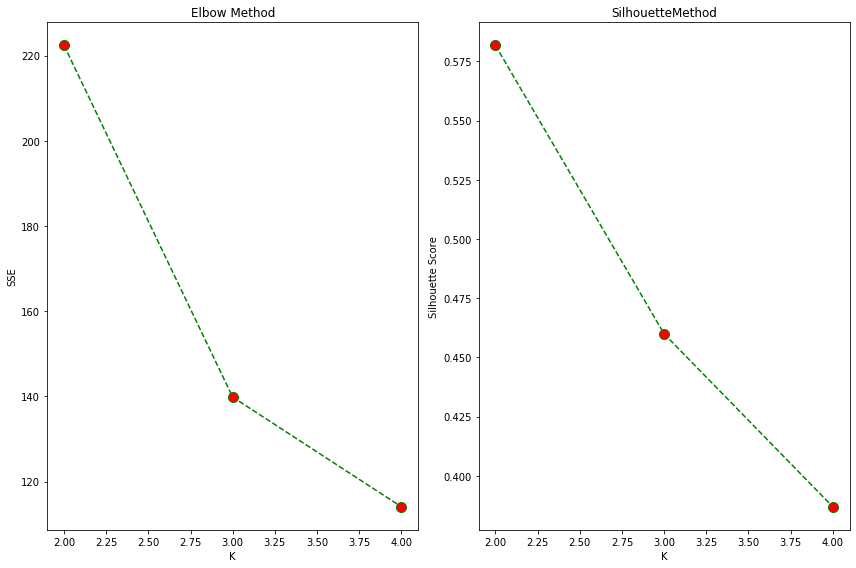

In [40]:
KM.plots()

If a variable was entered into the response field upon initiating the KMeansAnalysis object then the ResponseAnalysis method will print a confusion matrix between the results of the K clusters and the known response categories as well as the percentage of each known response in each cluster. Also this will return the original variables in the dataframe attached with a column indicating the cluster for each observation. If there is no response variable entered then all that is returned is the data frame. 

In the Iris use case example we can see that the clustering algorithm perfectly clustered the Setosa flowers and put .69 of the Versicolor together and .75 of the Virginica flowers together

<font size="4"> Analyze Clusters for Iris Data </font>

In [36]:
KM.ResponseAnalysis(3)
plt.tight_layout()

Cluster Response Confusion Matrix
Species  setosa  versicolor  virginica
Cluster                               
0             0          38         14
1             0          12         36
2            50           0          0
Proportion of Response in Cluster
Species  setosa  versicolor  virginica
Cluster                               
0           0.0    0.730769   0.269231
1           0.0    0.250000   0.750000
2           1.0    0.000000   0.000000


<Figure size 432x288 with 0 Axes>

The Scatterplot method takes in 2 variables and color codes the clustering in the 2-d space they create. Below we can see the Cluster plot and then the known scatter plot using the labeled Iris data. On the 2-d space we can see that the Clustering algorithm had issues of categorizes the values with Sepal.Length between 6 and 6.5 and a Petal.Length between 4 and 5.

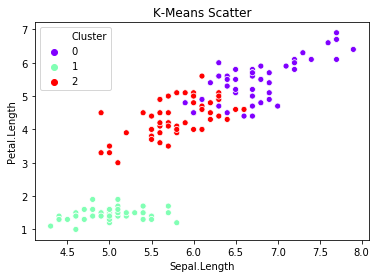

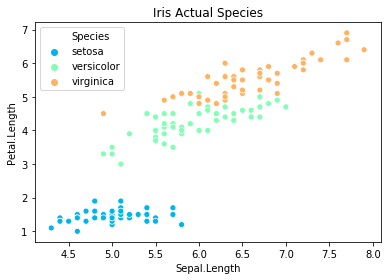

In [42]:
KM.Scatterplot(3,x='Sepal.Length',y='Petal.Length')
plt.figure(figsize=(5.5,4 ))
sns.scatterplot(x=iris['Sepal.Length'] , y =iris['Petal.Length'],data=iris, hue='Species',palette='rainbow')
plt.title('Iris Actual Species')

plt.tight_layout()
plt.show()

The Scatterplot3d method works similarly to the scatterplot method, however now we incorporate a 3rd dimension. In the Plots below we explore the same comparison between the 3 clusters the unsupervised algorithm produced and the actual species labels.

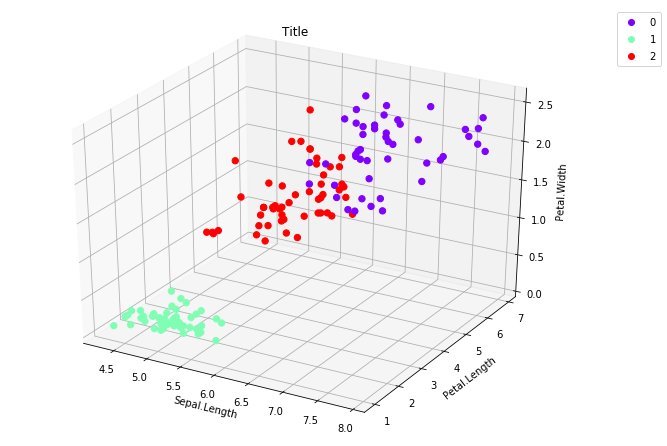

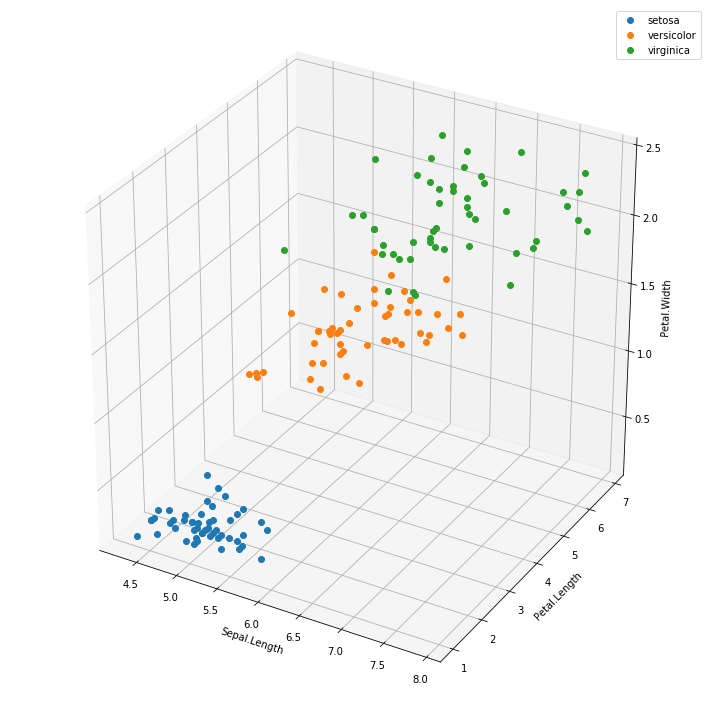

In [41]:
KM.Scatterplot3d(3,x='Sepal.Length',y='Petal.Length',z='Petal.Width')
plt.figure(figsize=(10,10 ))
df1 = iris[iris['Species']=='setosa'].reset_index(drop=True)
df2 = iris[iris['Species']=='versicolor'].reset_index(drop=True)
df3 = iris[iris['Species']=='virginica'].reset_index(drop=True)
axes = plt.subplot(111, projection='3d')


x1=df1['Sepal.Length']
x2 =df2['Sepal.Length']
x3 =df3['Sepal.Length']

y1=df1['Petal.Length']
y2=df2['Petal.Length']
y3=df3['Petal.Length']

z1=df1['Petal.Width']
z2=df2['Petal.Width']
z3=df3['Petal.Width']

axes = plt.subplot(111, projection='3d')
axes.plot(x1,y1,z1,"o",label=df1['Species'][0])
axes.plot(x2,y2,z2,"o",label=df2['Species'][0])
axes.plot(x3,y3,z3,"o",label=df3['Species'][0])
axes.set_xlabel('Sepal.Length')
axes.set_ylabel('Petal.Length')
axes.set_zlabel('Petal.Width')


plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
